In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphlab as gl
%matplotlib inline

#Things to show
Officially, 98.76% repayment rate.

Purpose: to show possible bias.

- loan amount distribution, w/ mean and median
- lender count distribution
- lender count of loan by gender
- lender count of loan by country
- lender count of loan by tfidf of use
- lender count of loan by posted month
- success & failure of loan by gender
- success & failure of loan by country
- success & failure of loan by tfidf of use
- map: loan country
- map: lender country
- map: lender to loan, the lending flow

In [142]:
# Load necessary data
lenders = pd.read_csv('data/lenders.csv', delimiter=',')
loans = pd.read_csv('data/loans.csv', delimiter=',')

In [4]:
# clean up extra headers in loans and lenders
loans = loans[loans['activity']!='activity']
lenders = lenders[lenders['lender_id'] != 'lender_id']

## Loan amount distribution

In [5]:
lenders['loan_count'] = lenders['loan_count'].astype(int)

In [9]:
lenders['loan_count'].describe()

count    1614189.000000
mean          10.965074
std          190.457299
min            0.000000
25%            0.000000
50%            1.000000
75%            5.000000
max       127554.000000
Name: loan_count, dtype: float64

(100, 140000.0)

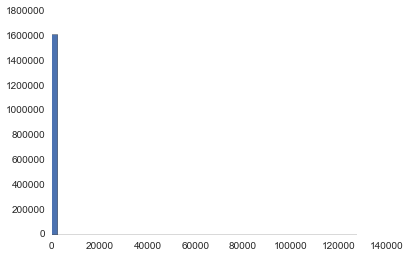

In [11]:
# sns.distplot(lenders['loan_count'].values, hist_kws={'normed': 'True'})
plt.hist(lenders['loan_count'], bins=50)
plt.xlim(100)

##Success and faillure from loan's eyes
**Success**: fully-funded, including *paid, in_repayment, funded, defaulted*.

**Failure**: not fully-funded, including *expired, inactive_expired*.

In [63]:
success_amount = loans[(loans['status']=='paid') |
                       (loans['status']=='in_repayment') |
                       (loans['status']=='funded') |
                       (loans['status']=='defaulted')].shape[0]

fail_amount = loans[(loans['status']=='expired') |
                    (loans['status']=='inactive_expired')].shape[0]

success_and_fail = success_amount + fail_amount

success_rate = success_amount / float(success_and_fail)
fail_rate = 1 - success_rate

In [67]:
print success_amount
print success_rate
print fail_amount
print fail_rate

793685
0.960405660172
32721
0.0395943398281


##Lender count distribution

In [14]:
loans['lender_count'] = loans['lender_count'].astype(int)

In [15]:
loans['lender_count'].describe()

count    841160.000000
mean         23.899098
std          26.605338
min           0.000000
25%           9.000000
50%          17.000000
75%          29.000000
max        2986.000000
Name: lender_count, dtype: float64

(array([  7.82972000e+05,   4.67190000e+04,   9.35000000e+03,
          1.58300000e+03,   2.70000000e+02,   1.59000000e+02,
          3.10000000e+01,   1.30000000e+01,   1.60000000e+01,
          6.00000000e+00,   1.10000000e+01,   3.00000000e+00,
          4.00000000e+00,   7.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

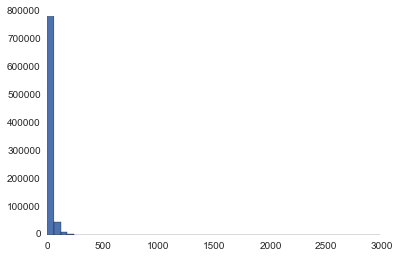

In [16]:
plt.hist(loans['lender_count'], bins=50)

(array([  4.61254000e+05,   2.37452000e+05,   7.72560000e+04,
          2.45230000e+04,   1.61050000e+04,   1.01720000e+04,
          5.46000000e+03,   3.40800000e+03,   2.34900000e+03,
          1.35100000e+03,   7.70000000e+02,   3.52000000e+02,
          1.83000000e+02,   1.01000000e+02,   8.30000000e+01,
          6.30000000e+01,   7.10000000e+01,   5.40000000e+01,
          3.60000000e+01,   2.00000000e+01,   7.00000000e+00,
          7.00000000e+00,   8.00000000e+00,   1.00000000e+00,
          8.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          8.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   5.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
        

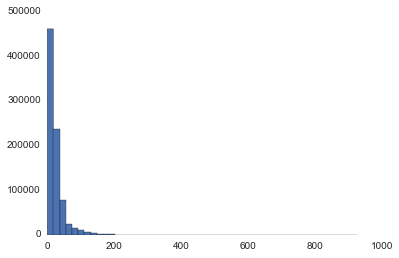

In [17]:
plt.hist(loans[loans['lender_count'] < 1000]['lender_count'], bins=50)

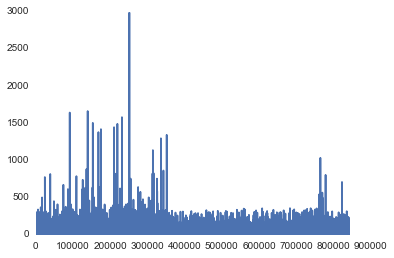

In [19]:
plt.plot(loans['lender_count'])

In [37]:
mean_lender_count = loans['lender_count'].mean()
median_lender_count = loans['lender_count'].median()

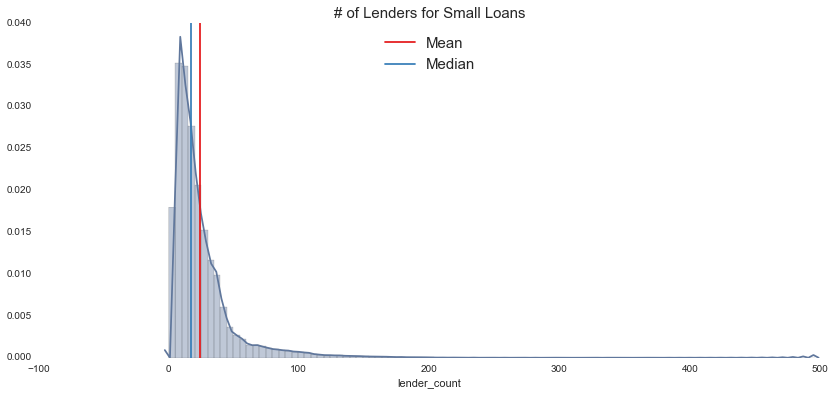

In [80]:
c1, c2 = sns.color_palette("Set1", 2)
fig = plt.figure(figsize=(14,6))
sns.distplot(loans[loans['lender_count']<500]['lender_count'], bins=100,
             hist_kws={"normed": True})
plt.axvline(mean_lender_count, label="Mean", c=c1)
# plt.annotate(mean_lender_count)
plt.axvline(median_lender_count, label="Median", c=c2)
# plt.annotate(median_lender_count)
plt.legend(loc='upper center', fontsize=15)
plt.title('# of Lenders for Small Loans', fontsize=15)

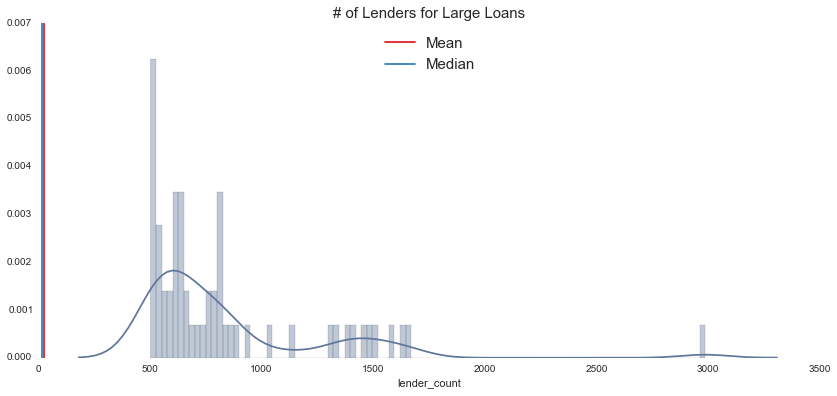

In [81]:
c1, c2 = sns.color_palette("Set1", 2)
fig = plt.figure(figsize=(14,6))
sns.distplot(loans[loans['lender_count']>500]['lender_count'], bins=100,
             hist_kws={"normed": True})
plt.axvline(mean_lender_count, label="Mean", c=c1)
# plt.annotate(mean_lender_count)
plt.axvline(median_lender_count, label="Median", c=c2)
# plt.annotate(median_lender_count)
plt.legend(loc='upper center', fontsize=15)
plt.title('# of Lenders for Large Loans', fontsize=15)

##lender count of loan by gender

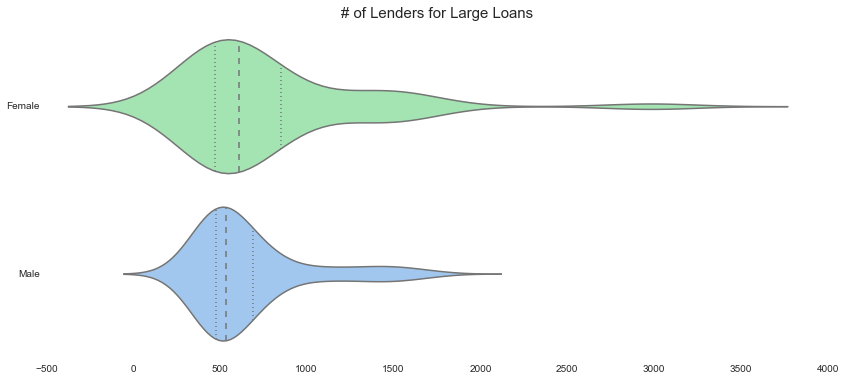

In [123]:
fig = plt.figure(figsize=(14,6))
lender_count_male = loans[(loans['gender']=='M') & (loans['lender_count'] > 400)]['lender_count']
lender_count_female = loans[(loans['gender']=='F') & (loans['lender_count'] > 400)]['lender_count']
sns.violinplot([lender_count_male, lender_count_female], names=["Male", "Female"], color="pastel", vert=False)
plt.title('# of Lenders for Large Loans', fontsize=15)

##lender count of loan by time

In [125]:
# clean and get data
lender_count_heat_year_month = loans[['lender_count', 'country', 'posted_date']]
lender_count_heat_year_month['posted_date'] = \
    lender_count_heat_year_month['posted_date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%dT%H:%M:%SZ'))
lender_count_heat_year_month.dropna(inplace=True)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [120]:
lender_count_heat_year_month['year'] = lender_count_heat_year_month['posted_date'].map(lambda x: int(x.year))
lender_count_heat_year_month['month'] = lender_count_heat_year_month['posted_date'].map(lambda x: int(x.month))
lender_count_heat_year_month = \
    lender_count_heat_year_month.groupby(['year', 'month'], as_index=False).aggregate(np.mean)
lender_count_heat_year_month = lender_count_heat_year_month.pivot("month", "year", "lender_count")
lender_count_heat_year_month.fillna(0, inplace=True)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

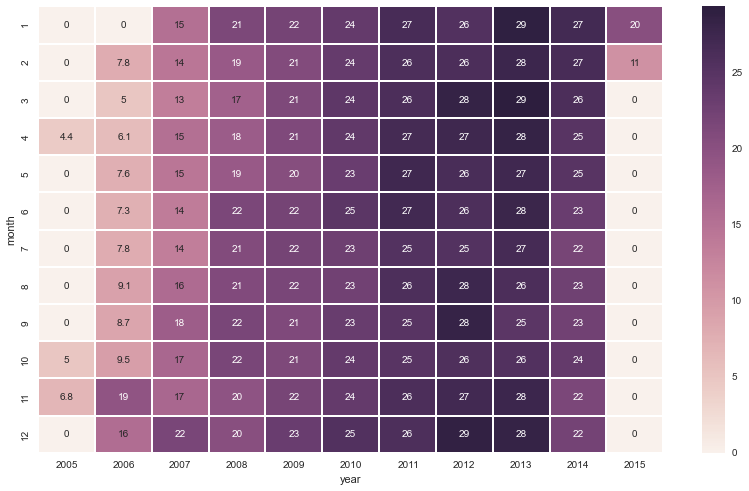

In [121]:
fig = plt.figure(figsize=(14, 8))
sns.heatmap(lender_count_heat_year_month, annot=True)

##Lender count by country

##lender count of loan by tfidf of use

##lender count of loan by posted month

##success & failure of loan by gender

##success & failure of loan by country

##success & failure of loan by tfidf of use

##map: loan country

##map: lender country

##map: lender to loan, the lending flow

In [195]:
m['coefficients']

{'intercept': -0.0016020778527853353, 'lender_id': Columns:
 	lender_id	str
 	linear_terms	float
 	factors	array
 
 Rows: 849604
 
 Data:
 +----------------+--------------------+---------------------------+
 |   lender_id    |    linear_terms    |          factors          |
 +----------------+--------------------+---------------------------+
 |      000       | -0.000556463492103 | [0.0, 0.0, 0.0, 0.0, 0.0] |
 |      0002      | -8.40888678795e-05 | [0.0, 0.0, 0.0, 0.0, 0.0] |
 | 0101craign0101 | 0.000808860524558  | [0.0, 0.0, 0.0, 0.0, 0.0] |
 |    0132575     |  0.0007108427817   | [0.0, 0.0, 0.0, 0.0, 0.0] |
 |    0154884     | 2.76092468994e-05  | [0.0, 0.0, 0.0, 0.0, 0.0] |
 |    0161130     |  -0.0001365110802  | [0.0, 0.0, 0.0, 0.0, 0.0] |
 |    0169713     |  0.00027060994762  | [0.0, 0.0, 0.0, 0.0, 0.0] |
 |    0185429     | -0.000163571457961 | [0.0, 0.0, 0.0, 0.0, 0.0] |
 |    0197462     | -0.000281989516225 | [0.0, 0.0, 0.0, 0.0, 0.0] |
 |    0206338     | 0.000313522352

In [218]:
lenders['lender_id'].iloc[545435]

'kitchensandbathsby'

In [215]:
m = gl.load_model('models/iter5_pipeline')

In [219]:
m.recommend(['kitchensandbathsby', 'jessica'], k=5)

lender_id,loan_id,score,rank
kitchensandbathsby,722883,0.94218322502,1
kitchensandbathsby,620811,0.825787392955,2
kitchensandbathsby,577600,0.809787068526,3
kitchensandbathsby,695450,0.807943731939,4
kitchensandbathsby,706146,0.807747249647,5
jessica,722883,0.942126385649,1
jessica,620811,0.825637301793,2
jessica,577600,0.809626370361,3
jessica,695450,0.80778184612,4
jessica,706146,0.807585237653,5
